**Hello World Example**

_This notebook is partly based on Chapter 3 of Aurelien Geron: Hand-on Machine Learning with Scikit-learn & Tensorflow._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
NB_ID = "CNN_MNIST"

# create the directory if it does not exist
os.makedirs(os.path.join(PROJECT_ROOT_DIR, "images", NB_ID), exist_ok = True)
        
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", NB_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

A couple utility functions to plot grayscale and RGB images:

In [2]:
import random
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def draw_func(list_of_imgs):
  fig, axs = plt.subplots(4, 4,figsize=(28, 14))

  for ax in axs.flatten(): 
    ax.imshow(list_of_imgs[random.randint(0,len(list_of_imgs)-1)], cmap=plt.cm.gray)

  plt.show()

# Import the Keras API from Tensorflow

In [3]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras import activations
# from tensorflow.keras import backend as K

# MNIST

MNIST is the hello world example of machine learning. scikit-learn can load the data directly from https://www.openml.org

In [4]:
import math
from sklearn.datasets import fetch_openml

X,y = fetch_openml('mnist_784',version=1,cache=True,return_X_y=True)
X = X.values

# Use the notion of y=f(X)
y = y.values.astype(int)
print('Data size: {0} x {1} and label size {2}'.format(X.shape[0],X.shape[1],y.shape[0]))
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))

Data size: 70000 x 784 and label size 70000
The images are of size: 28.0 x 28.0


In [5]:
 # reshape into images and normalize
 X = X.reshape(X.shape[0],28,28)/255


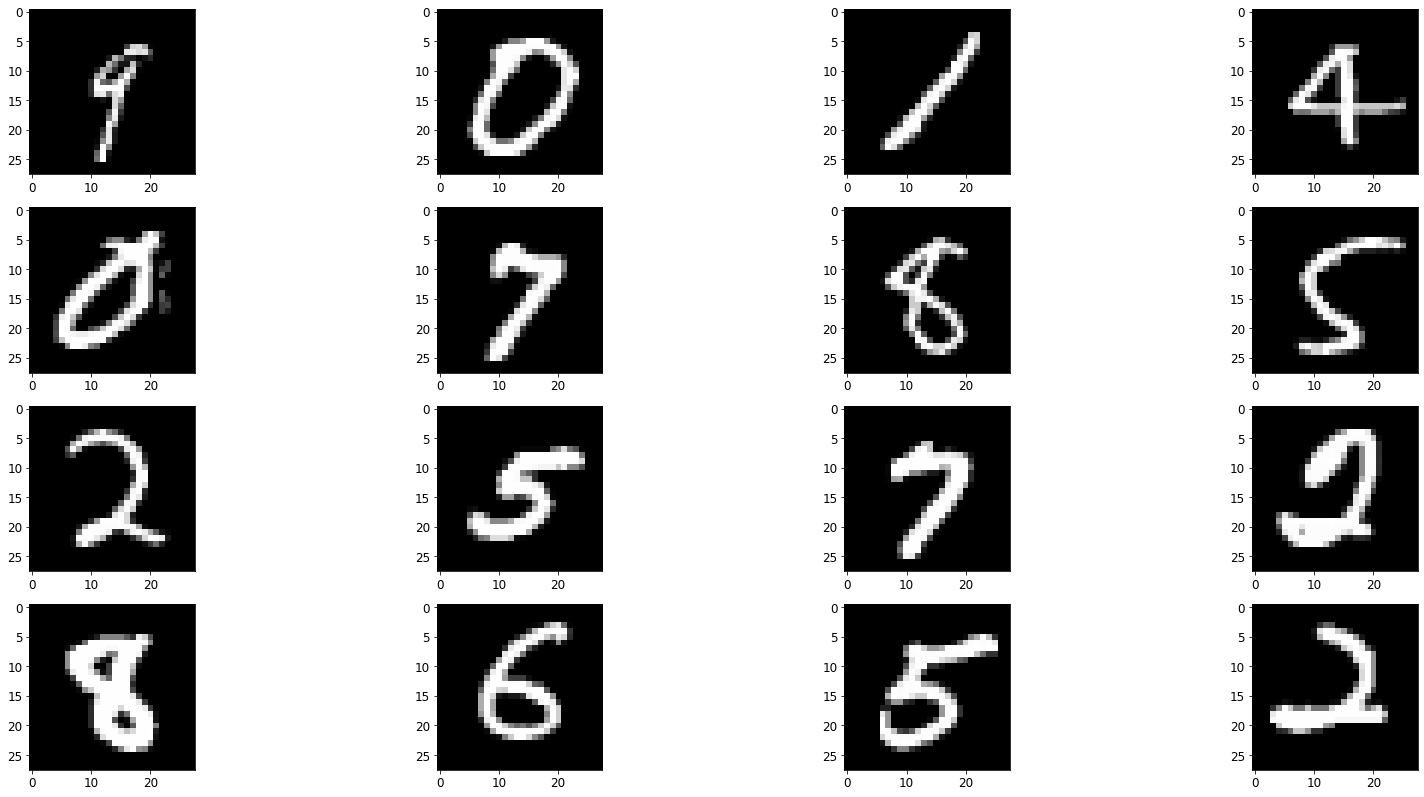

In [ ]:
draw_func(X)

# Histogram of Oriented Gradients

In [ ]:
from skimage.feature import hog

def ApplyHog(image):
  feature_Vector = hog(image, orientations=9, pixels_per_cell=[7,7],
              cells_per_block=[2,2],
            visualize=False, multichannel=False, block_norm="L2")
  return feature_Vector

X_HOG_Features = np.array([ApplyHog(x) for x in X])

In [ ]:
X_HOG_Features.shape

(70000, 324)

# Test and Training Data
Let's split into training images and test images.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_HOG_Features, y, test_size=1.0/7, stratify=y, random_state=42)

print('Matrix shape X: ', X_train.shape)
print('{0} samples for training'.format(X_train.shape[0]))
print('{0} samples for training'.format(X_test.shape[0]))

Matrix shape X:  (60000, 324)
60000 samples for training
10000 samples for training


Turn the numbers into one-hot vectors

In [ ]:
nClasses = 10
# Use Keras' handy utils
y_train_k = tensorflow.keras.utils.to_categorical(y_train, num_classes=nClasses)
y_test_k = tensorflow.keras.utils.to_categorical(y_test, num_classes=nClasses)


# MNIST Training

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=10, random_state=42))
ovo_clf.fit(X_train, y_train)

# You continue


*   Find Test accuracy using HOG + SVM
*   Find Test accuracy using SVM on raw image data
*   Try to improve HOG + SVM performance

